<a href="https://colab.research.google.com/github/erobrien6/DataSciencePsychNeuro/blob/master/O'Brien_DSPN_S23_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Individual Difference Factors bias Perceptions of Partner Instrumentality

## Background
Instrumentality—providing support to facilitate another person’s goal achievement—is important in the development of attraction (Chandler et al., 2021; Finkel & Eastwick, 2015), closeness (Fitzsimons & Fishbach, 2010; Fitzsimons & Shah, 2008; Orehek et al., 2018), gratitude (Converse & Fishbach, 2012), and relationship satisfaction (Cappuzzello & Gere, 2018). Studies have shown that when a romantic partner facilitates one’s goal achievement, goal pursuit becomes more efficient and less effortful (Cappuzzello & Gere, 2018; Fitzsimons et al., 2015). Moreover, perceiving a lack of instrumentality from a partner is associated with less appreciation for and less positive evaluation of that partner (Converse & Fishbach, 2012; Fitzsimons & Shah, 2008).

Previous literature has found strong evidence that higher perceptions of partner instrumentality (PPI) predict many positive relationship outcomes, but this work has yet to explore what factors may enhance or undermine PPI. However, because perceptions of others include elements of accuracy and bias (Fletcher & Kerr, 2010, Gagné & Lydon, 2004), people may not always detect when their partners attempt to provide support. In other cases, people may perceive that their partners are being supportive to their goals even when their partners did not report giving support (Morry et al., 2010). 

Although perceiving a partner as instrumental is associated with desirable outcomes, little is known about the factors that shape people’s perceptions of their romantic partner’s instrumentality. Therefore, it is important to initiate research to understand what factors influence PPI in relationships; determining what factors facilitate or obstruct such perceptions can provide insight into how people can better recognize, appreciate, and benefit from their partner’s instrumentality. 

In the current work, we assess how several factors, such as depressive symptoms and relationship quality, predict participants' perceptions of their romantic partner's instrumentality. By comparing PPI to partner self-reported instrumentality, we can examine how individual difference factors predict biases in perceptions of a romantic partner's support towards one's goal pursuits. The original dataset was collected in a dyadic observational study in which one member from each couple was randomly assigned to the role of “responder” or “discloser” for a support conversation. Before the support conversation took place, both couple members independently completed a variety of background measures, including the measures of interest for the current investigation: individual differences factors, self-reported instrumentality, and perceptions of partner instrumentality. After completion of the background measures and the in-lab support conversation, participants filled out some additional measures, which were filled out again in a one-year follow-up online survey. However, all measures of interest in the current investigation are drawn from the background questionnaires from Time 1 of the original investigation. 


## Variables

*   Subject ID: Subject_ID
*   Couple ID: Couple_ID

**Demographic Variables:**

*   Gender: participants identified as either men, women, non-binary, or could self-identify.

**Self-Reported Individual Difference Factors:** 

*   Self-esteem: 10-item Likert scale (Rosenberg, 1965)
* Attachment Insecurity: 12-item Likert scale measuring anxious, avoidant, and secure attachment styles (Wei et al., 2007)
* Relationship Quality: 6-item Likert scale (Fletcher, Simpson, & Thomas, 2000)
* Commitment: 15-item scale (Rusbult et al., 2009)
* Closeness: 1-item Inclusion of Other in the Self pictorial scale (Aron, Aron, & Smollan, 1992) 
* Depressive symptoms: 20-item Likert scale measuring presence of depressive symptomatology where higher scores indicate higher depressive symptoms experienced (Radloff, 1977). 



**Dependent Variable:**
* Perceived Partner Instrumentality: participants reported how helpful or harmful their partner generally is towards their goal pursuits across 9 domains: academic, career, financial, health/fitness, leisure/fun, personal improvement, service, sex/romance, and social connection. Reports were indicated on a Likert scale ranging from -5 (extremely harmful to 5 (extremely helpful) where 0 indicates “neither helpful nor harmful.” 


## Hypotheses

**H1:** I predict that depressive symptoms will be negatively associated with PPI, controlling for partner self-reported instrumentality. Literature on depression and related symptoms found evidence that people high in depressive symptoms exhibit biased attention towards negative information (Peckham et al., 2010) and have higher tendencies to ruminate (Donaldson et al., 2007). These cognitive patterns may therefore decrease or prevent perceptions of goal support from a romantic partner.

**H2:** I predict that relationship quality will be positively associated with PPI, controlling for partner self-reported instrumentality. Individuals in high-quality relationships were especially likely to partner-enhance (i.e. rate their partner more positively than themselves) when evaluating negative versus positive traits (Morry et al., 2010), suggesting that high RQ may prompt ignorance towards the negative qualities of romantic partners. These positive biases and inflated regard of one’s partner may lead individuals to more readily perceive their partner as instrumental to their goals. 

**H3:** I predict that a Relationship Quality x Depressive Symptoms interaction will emerge, such that higher relationship quality will partially buffer the negative relationship of depressive symptoms and PPI, controlling for partner self-reported instrumentality. 

## Data Plan Organization

Data Cleansing & Architecture:
* Data Auditing
* Workflow Specification
* Workflow Execution & Post-processing Control

Statistical Analyses (Step by step):
1. Summary Statistics
2. Correlation Matrices - Predictors
3. Principal Component Analysis
4. Best Subset Selection
5. Mixed Effects Modeling
6. Moderation Analysis

### Data Cleansing & Data Architecture
#### Data Auditing
1. Make new csv file from original data file
* Note: to protect participant confidentiality, I was not given access to most demographic variables, such as age, race, or ethnicity. However, gender was included in the final dataset.

2. Maintain data relevant to research questions
* ParticipantID
* CoupleID: grouping variable for mixed effects models
Individual Difference Measures
* Self-Esteem (GM_SE)
* Attachment Anxiety (Anx_Attach)
* Attachment Avoidance (Avoid_Attach)
* Relationship Quality (GM_RQ)
* Commitment (GM_Commit)
* Closeness (IOS)
Perceived Partner Instrumentality (PPI)

3. Remove participants who did not meet inclusion criteria
* 2 couples were removed (4 participants) due to not being in a relationship for at least 3 months (CoupleID=33, 49)
* 1 couple (two participants) was removed due to a failed attention check (CoupleID=65)
* 2 couples (four participants) were removed due to missing data (CoupleID=39, 40)

#### Workflow Specification
No data anomalies present.
#### Workflow Execution and Post-processing Control
No automated processes necessary to assess data quality.




## Statistical Analyses

### 1. Summary Statistics

Before getting my tidy-compliant table and summary statistics, I will first:
* Remove participants who failed inclusion criteria
* Remove participants who had missing data
* Properly reverse-score items according to scale instructions
* Create composite variables for predictors and outcomes

In [ ]:
# Import RGP Dataset
library(tidyverse)
library(haven)
library(psych)
library(dplyr)
library(ggplot2)
library(car)
library(gridExtra)
library(pls)
library(leaps)
library(lme4)
library(jtools)
library(interactions)
library(misty)

In [ ]:
df_dspn <- read_sav('/content/Forest_Confidential Deidentified CRDF Time 1 Data for Emily OBrien Stats Assignment Fall 2022 (1).sav')

In [ ]:
# Select Individual Difference Factors and Outcomes of Interest
#colnames(df_dspn)
df_cleaned <- df_dspn[c(1, 2, 6, 8:17, 89:142, 285:302)]

# Maintained SE, CES-D, RQ, IOS, Commitment, Attachment Anxiety and Avoidance, Self-Reported Instrumentality (covariate)
# Outcomes: PPI

In [ ]:
# Data Cleaning - Inclusion Criteria

# Remove cases that failed inclusion criteria
df_cleaned <- df_cleaned %>%
  filter(!(CoupleID == "065")) # failed attention check

# Less than 3 months together
df_cleaned <- df_cleaned %>%
  filter(!(CoupleID == "049"))

df_cleaned <- df_cleaned %>%
  filter(!(CoupleID == "033"))

# Get rid of cases with highly missing data
df_cleaned <- df_cleaned %>%
  filter(!(CoupleID == "040"))
df_cleaned <- df_cleaned %>%
  filter(!(CoupleID == "039"))

head(df_cleaned)
dim(df_cleaned)
# N = 196; 98 couples

CoupleID,ParticipantID,Gender,RSE1,RSE2,RSE3,RSE4,RSE5,RSE6,RSE7,⋯,Partner_Instrumentality_SocialSupportConnection,My_Instrumentality_Academic,My_Instrumentality_Career,My_Instrumentality_Financial,My_Instrumentality_HealthFitness,My_Instrumentality_LeisureFun,My_Instrumentality_PersonalImprovementGrowth,My_Instrumentality_ServiceHelping,My_Instrumentality_SexRomance,My_Instrumentality_SocialSupportConnection
<chr>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>
001,001D,2,9,9,3,5,1,9,9,⋯,10,6,6,6,6,10,11,7,11,10
001,001R,1,9,9,1,8,2,9,8,⋯,11,9,11,3,9,9,9,9,11,11
002,002D,1,8,8,1,7,1,9,8,⋯,11,11,11,11,11,11,11,11,11,11
002,002R,2,7,8,3,6,3,8,7,⋯,5,5,5,3,5,8,8,7,8,9
003,003D,1,8,9,1,7,2,7,4,⋯,6,6,6,8,8,7,7,8,8,6
003,003R,2,5,5,5,6,5,5,6,⋯,10,8,8,8,8,8,8,8,8,8


[1] 196  85

In [ ]:
# Reverse Scores
#install.packages('misty')
library(misty)
# Reverse CESD
df_cleaned$CESD4 <- item.reverse(df_cleaned$CESD4, min = 1, max = 4)
df_cleaned$CESD8 <- item.reverse(df_cleaned$CESD8, min = 1, max = 4)
df_cleaned$CESD12 <- item.reverse(df_cleaned$CESD12, min = 1, max = 4)
df_cleaned$CESD16 <- item.reverse(df_cleaned$CESD16, min = 1, max = 4)

# Reverse Self-Esteem 
# Higher scores indicate higher SE
df_cleaned$RSE3 <- item.reverse(df_cleaned$RSE3, min = 1, max = 9)
df_cleaned$RSE5 <- item.reverse(df_cleaned$RSE5, min = 1, max = 9)
df_cleaned$RSE9 <- item.reverse(df_cleaned$RSE9, min = 1, max = 9)
df_cleaned$RSE10 <- item.reverse(df_cleaned$RSE10, min = 1, max = 9)

# Reverse Attachment
df_cleaned$ECR1 <- item.reverse(df_cleaned$ECR1, min = 1, max = 7)
df_cleaned$ECR5 <- item.reverse(df_cleaned$ECR5, min = 1, max = 7)
df_cleaned$ECR8 <- item.reverse(df_cleaned$ECR8, min = 1, max = 7)
df_cleaned$ECR9 <- item.reverse(df_cleaned$ECR9, min = 1, max = 7)


# Transform Inst. Scores to -5 +5 scale from 1-11

# Perceptions of Partner Instrumentality
df_cleaned <- df_cleaned %>%
  mutate(PPI_academic = (Partner_Instrumentality_Academic - 6))
df_cleaned <- df_cleaned %>%
  mutate(PPI_financial = (Partner_Instrumentality_Financial - 6))
df_cleaned <- df_cleaned %>%
  mutate(PPI_career = (Partner_Instrumentality_Career - 6))
df_cleaned <- df_cleaned %>%
  mutate(PPI_health = (Partner_Instrumentality_HealthFitness - 6))
df_cleaned <- df_cleaned %>%
  mutate(PPI_fun = (Partner_Instrumentality_LeisureFun - 6))
df_cleaned <- df_cleaned %>%
  mutate(PPI_sex = (Partner_Instrumentality_SexRomance - 6))
df_cleaned <- df_cleaned %>%
  mutate(PPI_service = (Partner_Instrumentality_ServiceHelping - 6))
df_cleaned <- df_cleaned %>%
  mutate(PPI_growth = (Partner_Instrumentality_PersonalImprovementGrowth - 6))
df_cleaned <- df_cleaned %>%
  mutate(PPI_social = (Partner_Instrumentality_SocialSupportConnection - 6))

# Transform Partner Self Reports of Inst
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Academic = (My_Instrumentality_Academic - 6))
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Career = (My_Instrumentality_Career - 6))
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Financial = (My_Instrumentality_Financial - 6))
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Health = (My_Instrumentality_HealthFitness - 6))
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Growth = (My_Instrumentality_PersonalImprovementGrowth - 6))
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Sex = (My_Instrumentality_SexRomance - 6))
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Fun = (My_Instrumentality_LeisureFun - 6))
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Service = (My_Instrumentality_ServiceHelping - 6))
df_cleaned <- df_cleaned %>%
  mutate(SR_Inst_Social = (My_Instrumentality_SocialSupportConnection - 6))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Create Predictor Composites
# Depressive Symptoms
alpha(df_cleaned[c("CESD1", "CESD2", "CESD3", "CESD4", "CESD5", "CESD6", "CESD7",
                "CESD8", "CESD9", "CESD10", "CESD11", "CESD12", "CESD13",
                "CESD14", "CESD15", "CESD16", "CESD17", "CESD18", "CESD19", "CESD20")])

# a = 0.92

df_cleaned$depression <- rowMeans(df_cleaned[c("CESD1", "CESD2", "CESD3", "CESD4",
                                               "CESD5", "CESD6", "CESD7", "CESD8",
                                               "CESD9", "CESD10", "CESD11", "CESD12",
                                               "CESD13", "CESD14", "CESD15", "CESD16",
                                               "CESD17", "CESD18", "CESD19", "CESD20")], na.rm = TRUE)

# Mean Center Depression
df_cleaned <- df_cleaned %>%
  mutate(GM_depression = scale(depression, scale=FALSE))
summary(df_cleaned$GM_depression) #-0.55 to 1.85
 
#--------------------------------------
# Relationship Quality
alpha(df_cleaned[c("PRQC_Satisfied", "PRQC_Love", "PRQC_Committed", "PRQC_Passionate",
                "PRQC_Trust", "PRQC_Intimate")])

# alpha = 0.8

df_cleaned$RQ <- rowMeans(df_cleaned[c("PRQC_Satisfied", "PRQC_Love", "PRQC_Committed",
                                       "PRQC_Passionate", "PRQC_Trust", "PRQC_Intimate")], na.rm = TRUE)

# Mean Center Quality
df_cleaned <- df_cleaned %>%
  mutate(GM_RQ = scale(RQ, scale=FALSE))

summary(df_cleaned$GM_RQ)

#--------------------------------------
# Self-Esteem
alpha(df_cleaned[c("RSE1", 'RSE2', 'RSE3', 'RSE4', 'RSE5', 'RSE6', 'RSE7', 'RSE8',
                'RSE9', 'RSE10')])
# alpha = 0.83

df_cleaned$SE <- rowMeans(df_cleaned[c("RSE1", 'RSE2', 'RSE3', 'RSE4', 'RSE5', 'RSE6', 'RSE7', 'RSE8', 'RSE9', 'RSE10')], na.rm = TRUE)

# Mean Center SE
df_cleaned <- df_cleaned %>%
  mutate(GM_SE = scale(SE, scale=FALSE))

summary(df_cleaned$GM_SE)

#--------------------------------------
# Attachment Styles - Higher scores indicate higher insecurity
# Anxious Attachment
alpha(df_cleaned[c('ECR2', 'ECR4', 'ECR6', 'ECR8', 'ECR10', 'ECR12')]) #0.70
df_cleaned$Anx_Attach <- rowMeans(df_cleaned[c('ECR2', 'ECR4', 'ECR6', 'ECR8', 'ECR10', 'ECR12')], na.rm =T)

# Avoidant Attachment
alpha(df_cleaned[c('ECR1', 'ECR3', 'ECR5', 'ECR7', 'ECR9', 'ECR11')]) #0.79
df_cleaned$Avoid_Attach <- rowMeans(df_cleaned[c('ECR1', 'ECR3', 'ECR5', 'ECR7', 'ECR9', 'ECR11')], na.rm=T)

# Did not mean center because numeric scores are meaningful in this scale

#--------------------------------------
# Commitment
alpha(df_cleaned[c('Commitment1', 'Commitment2', 'Commitment3', 'Commitment4',
                   'Commitment5', 'Commitment6', 'Commitment7', 'Commitment8',
                   'Commitment9', 'Commitment10', 'Commitment11', 'Commitment12',
                   'Commitment13', 'Commitment14', 'Commitment15')])
#alpha = 0.90

df_cleaned$Commitment <- rowMeans(df_cleaned[c('Commitment1', 'Commitment2', 'Commitment3', 'Commitment4',
                   'Commitment5', 'Commitment6', 'Commitment7', 'Commitment8',
                   'Commitment9', 'Commitment10', 'Commitment11', 'Commitment12',
                   'Commitment13', 'Commitment14', 'Commitment15')], na.rm=T)

# Mean Center Commitment
df_cleaned <- df_cleaned %>%
  mutate(GM_Commit = scale(Commitment, scale=FALSE))

summary(df_cleaned$GM_Commit)

#--------------------------------------
# Self-Reported Instrumentality
alpha(df_cleaned[c('SR_Inst_Academic', 'SR_Inst_Financial', 'SR_Inst_Career', 
                   'SR_Inst_Health', 'SR_Inst_Growth', 'SR_Inst_Sex', 'SR_Inst_Service',
                   'SR_Inst_Fun', 'SR_Inst_Social')])
#alpha = 0.88

df_cleaned$SR_Inst <- rowMeans(df_cleaned[c('SR_Inst_Academic', 'SR_Inst_Financial', 'SR_Inst_Career', 
                   'SR_Inst_Health', 'SR_Inst_Growth', 'SR_Inst_Sex', 'SR_Inst_Service',
                   'SR_Inst_Fun', 'SR_Inst_Social')], na.rm=T)

df_cleaned <- df_cleaned %>%
mutate(SR_Inst = scale(SR_Inst, scale = FALSE))

summary(df_cleaned$SR_Inst)


In [ ]:
# Create Outcome Composite - PPI
alpha(df_cleaned[c('PPI_academic', 'PPI_financial', 'PPI_career', 'PPI_health',
                   'PPI_fun', 'PPI_growth', 'PPI_sex', 'PPI_social', 'PPI_service')])
# alpha = 0.90

df_cleaned$PPI <- rowMeans(df_cleaned[c('PPI_academic', 'PPI_financial', 'PPI_career', 'PPI_health',
                   'PPI_fun', 'PPI_growth', 'PPI_sex', 'PPI_social', 'PPI_service')], na.rm = T)

summary(df_cleaned$PPI)

## Tidy Compliant Table

In [ ]:
#colnames(df_cleaned)
df_tidy <- df_cleaned[c(1:3, 40, 105, 107, 109:111, 113:115)]

library("writexl")
write_xlsx(df_tidy,"C:\\Users\\ERO36\\OneDrive - University of Pittsburgh\\Desktop\\Research\\df_tidy.xlsx")

# Exported to Excel, then flipped SR_Inst scores between partners to create covariate,
# Partner Self-Reported Instrumentality. Controlling for this variable in the models
# will allow us to see whether PPI differs significantly from how a partner describes their own behavior

library("readxl")
df_tidy <- read_excel('/content/df_tidy.xlsx')
dim(df_tidy)


[1] 196  13

In [ ]:
# Summary Statistics Table
df_descript <- df_tidy %>%
  select(c(4:10, 12:13))

#install.packages('vtable')
library(vtable)
st(df_descript, digits=2, title = 'Descriptive Statistics')

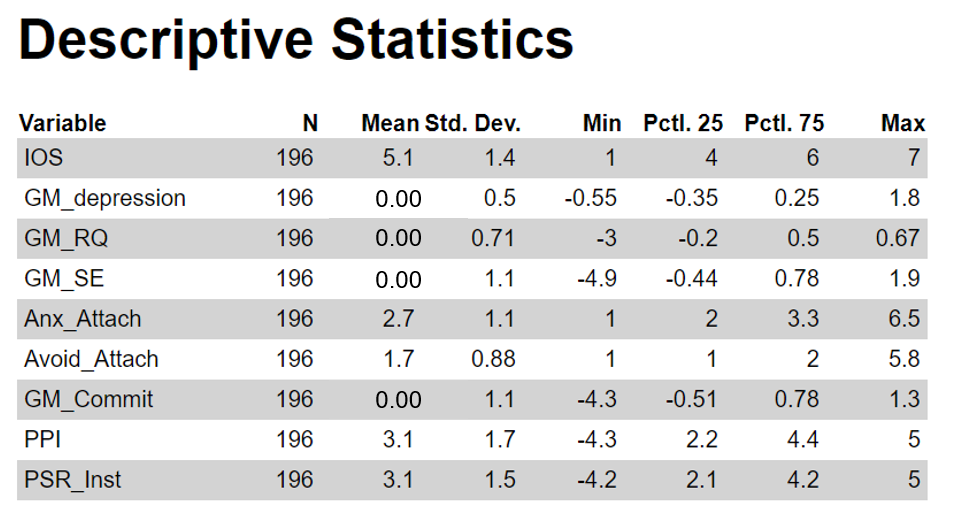

### 2. Correlation Matrices - Predictors

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘webshot’, ‘insight’, ‘datawizard’, ‘kableExtra’, ‘sjlabelled’


Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




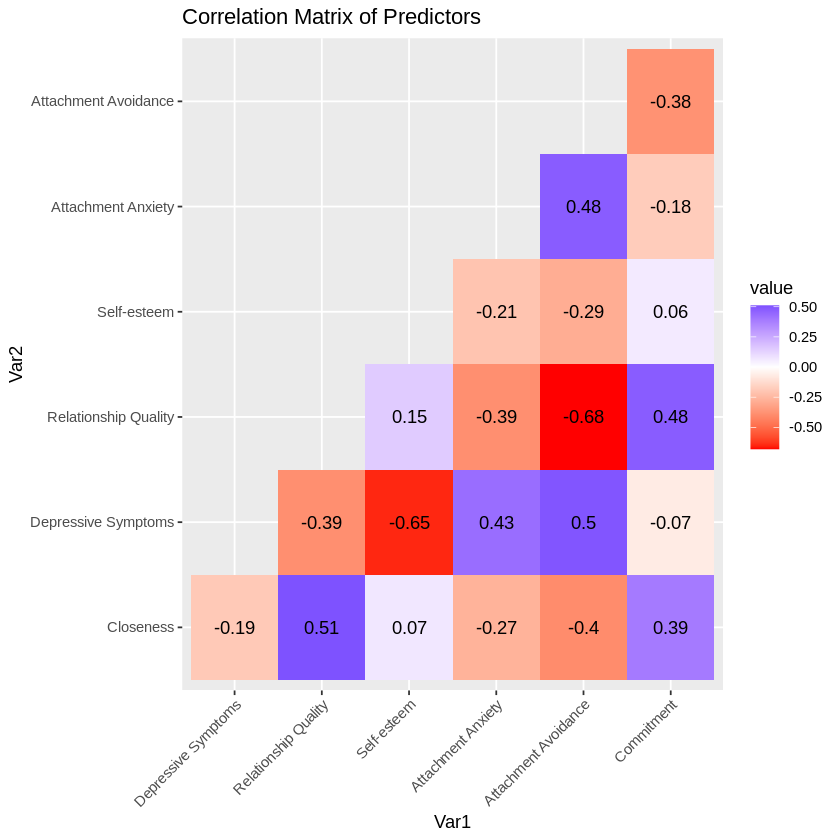

In [ ]:
# Predictors Correlation Matrix
#install.packages('reshape2')
library(reshape2)
df_predictors <- df_tidy %>%
  select(c(4:10))

pred_cor <- round(cor(df_predictors, use='complete.obs'), 2)

getLowerTri <- function(pred_cor) {
  pred_cor[upper.tri(pred_cor)] <- NA
  return(pred_cor)}

pred_cor[upper.tri(pred_cor, diag=T)] <- NA
lowerTri <- getLowerTri(pred_cor)
melt_cor = melt(lowerTri, na.rm = T)


# Plot Correlation Matrix
ggplot(data=melt_cor, aes(x = Var1, y = Var2, fill=value)) +
  geom_tile() +
  scale_x_discrete(labels = c('Depressive Symptoms', 'Relationship Quality', 'Self-esteem', 'Attachment Anxiety', 'Attachment Avoidance', 'Commitment')) +
  scale_y_discrete(labels = c('Closeness', 'Depressive Symptoms', 'Relationship Quality', 'Self-esteem', 'Attachment Anxiety', 'Attachment Avoidance')) +
  scale_fill_gradient2(low = 'red', high = 'blue', mid = 'white') +
  theme(axis.text.x = element_text(angle=45, vjust = 1, hjust = 1)) +
  ggtitle('Correlation Matrix of Predictors') +
  geom_text(aes(Var1, Var2, label = value), color='black')

The correlation matrix shows that there are relatively strong correlations between many of the predictor variables of interest. In particular, strong positive correlations emerged between Closeness, Relationship Quality, and Commitment, as well as between Depressive symptoms, Attachment Anxiety, and Attachment Avoidance. There were several strong negative correlations as well, esepcially between Self-esteem and Depressive symptoms, and Attachment Avoidance and Relationship Quality.

Due to the relatively strong correlations between predictor variables, there may be multicollinearity present. Therefore, I will conduct a Principal Components Analysis before calculating a generalized linear model.

### 3. Principal Component Analysis

Warning message:
“In princomp.default(df_predictors, scale. = TRUE) :
 extra argument ‘scale.’ will be disregarded”


Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.7744866 1.2188059 0.9757286 0.9641432 0.68627764
Proportion of Variance 0.4342163 0.2048470 0.1312861 0.1281869 0.06494718
Cumulative Proportion  0.4342163 0.6390633 0.7703494 0.8985363 0.96348350
                           Comp.6     Comp.7
Standard deviation     0.41597905 0.30293207
Proportion of Variance 0.02386182 0.01265468
Cumulative Proportion  0.98734532 1.00000000

Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6     Comp.7 
0.43421627 0.20484705 0.13128608 0.12818692 0.06494718 0.02386182 0.01265468

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7 
0.4342163 0.6390633 0.7703494 0.8985363 0.9634835 0.9873453 1.0000000

Comp.5 Comp.6 Comp.7 
     5      6      7

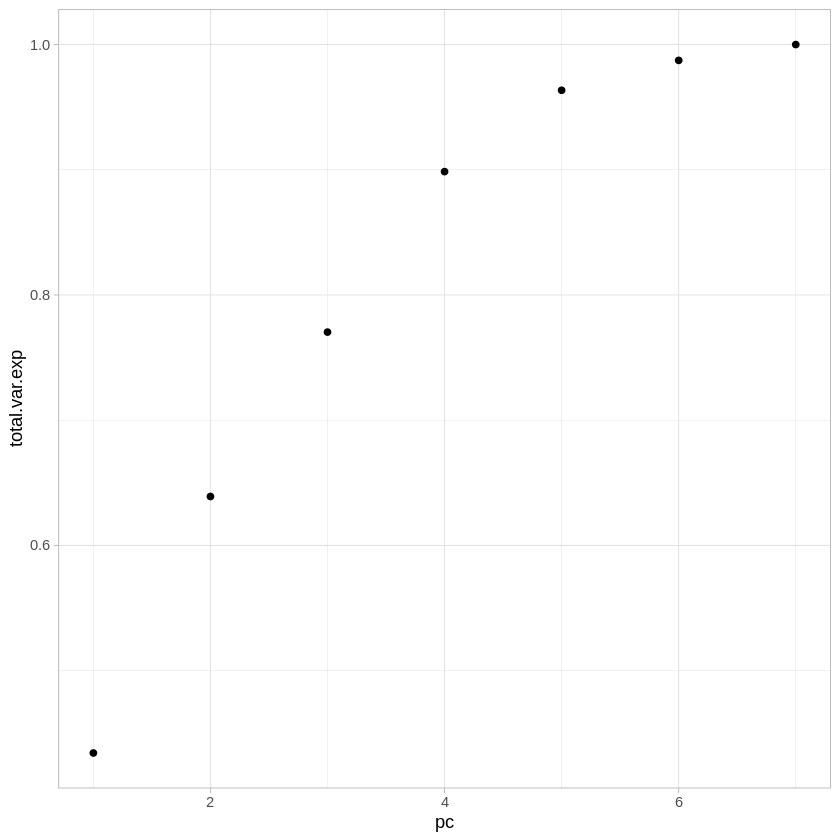

In [ ]:
# PCA
obj_pca <- princomp(df_predictors, scale. = TRUE)
summary(obj_pca)

# Cumulative Variance Plot
pca_vars <- (obj_pca$sdev^2)
pca_vars / sum(pca_vars)
total_var <- cumsum(pca_vars/sum(pca_vars))
total_var

ggplot(data.frame(pc=1:7, total.var.exp=total_var),
       aes(x=pc, y=total.var.exp)) +
  geom_point() +
  theme_light()

# How many components are needed to explain 95% of the variance?
which(total_var >= 0.95)
# Need 5 components for at least 95%

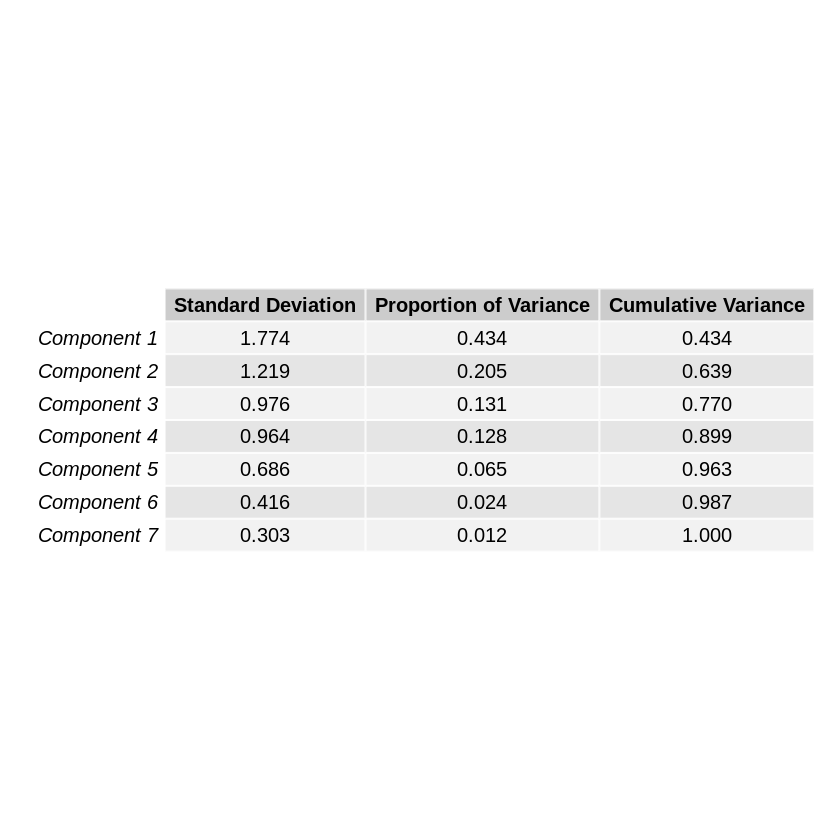

In [ ]:
# Create summary Table
pca_sd <- round(summary(obj_pca)$sdev, digits = 3)
# get variance from obj_pca output
prop_var <- c('0.434', '0.205', '0.131', '0.128', '0.065', '0.024', '0.012')
cumu_var <- c('0.434', '0.639', '0.770', '0.899', '0.963', '0.987', '1.000')

summary_pca <- data.frame(pca_sd, prop_var, cumu_var)
rownames(summary_pca) <- c('Component 1', 'Component 2', 'Component 3', 'Component 4',
                           'Component 5', 'Component 6', 'Component 7')
colnames(summary_pca) <- c('Standard Deviation', 'Proportion of Variance', 'Cumulative Variance')

grid.table(summary_pca)

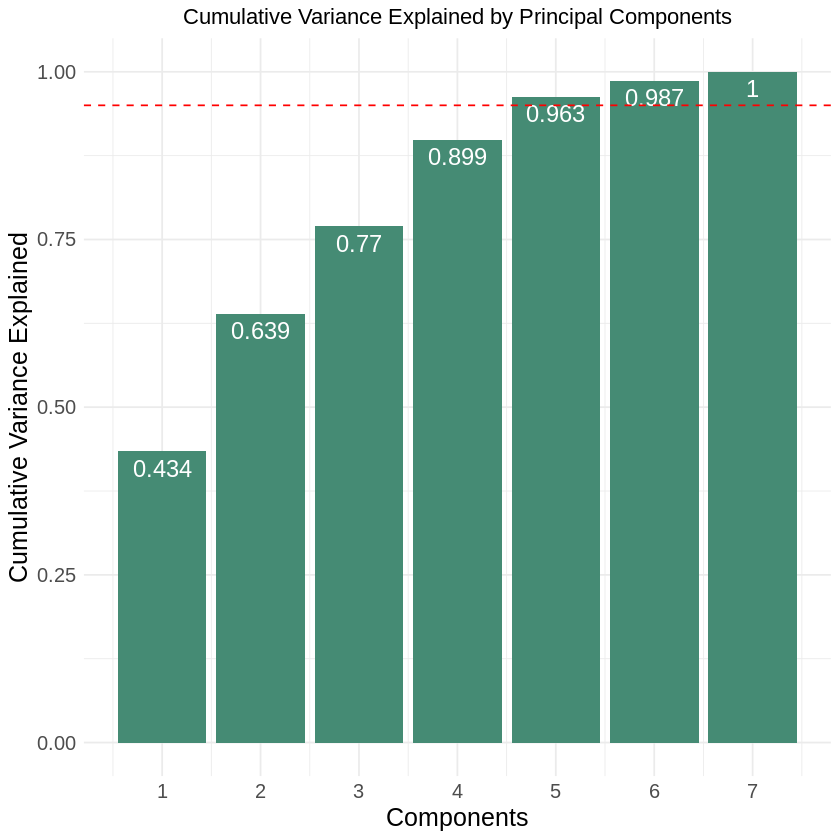

In [ ]:
# Cumulative Variance Plot
values <- c(0.434, 0.639, 0.77, 0.899, 0.963, 0.987, 1.0)
comp_num <- c(1:7)
df_pca <- data.frame(comp_num, values)

myTheme <- ttheme_default(base_size = 10, base_colour = 'black')
ggplot(df_pca, aes(x=comp_num, y=values)) +
  geom_bar(stat = 'identity', fill = 'aquamarine4') +
  geom_text(aes(label = round(values, digits = 3)), vjust=1.5, color = 'white', size = 5) +
  theme_minimal() +
  labs(x = 'Components', y = 'Cumulative Variance Explained') +
  theme(plot.title = element_text(hjust = 0.5), axis.text=element_text(size=12), axis.title=element_text(size=15)) +
  geom_hline(yintercept=0.95, linetype = 'dashed', color = 'red') +
  scale_x_continuous(breaks=c(1:7)) +
  ggtitle("Cumulative Variance Explained by Principal Components")

The PCA analysis suggests that the first 5 components account for at least 95% of the variance among the variables. This indicates that some of the individual differences measures are not necessary when creating a model to evaluate differences in PPI.

However, because I am interested in specific individual difference factors' relationships with PPI, I will use best subset selection to select specific features to maintain in my model. 

### 4. Best Subset Selection

Subset selection object
Call: regsubsets.formula(PPI ~ ., data = df_descript, nvmax = 8)
8 Variables  (and intercept)
              Forced in Forced out
IOS               FALSE      FALSE
GM_depression     FALSE      FALSE
GM_RQ             FALSE      FALSE
GM_SE             FALSE      FALSE
Anx_Attach        FALSE      FALSE
Avoid_Attach      FALSE      FALSE
GM_Commit         FALSE      FALSE
PSR_Inst          FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         IOS GM_depression GM_RQ GM_SE Anx_Attach Avoid_Attach GM_Commit
1  ( 1 ) " " " "           "*"   " "   " "        " "          " "      
2  ( 1 ) " " "*"           "*"   " "   " "        " "          " "      
3  ( 1 ) " " "*"           "*"   " "   " "        "*"          " "      
4  ( 1 ) " " "*"           "*"   " "   " "        "*"          " "      
5  ( 1 ) " " "*"           "*"   " "   " "        "*"          "*"      
6  ( 1 ) "*" "*"           "*"   " "   " "        "*"          "*"

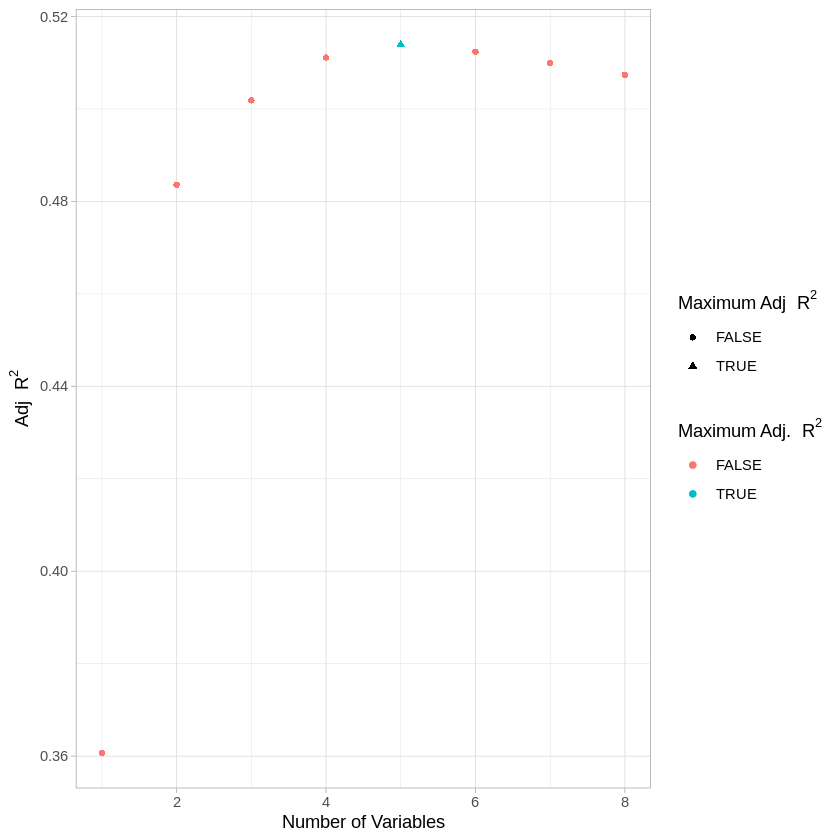

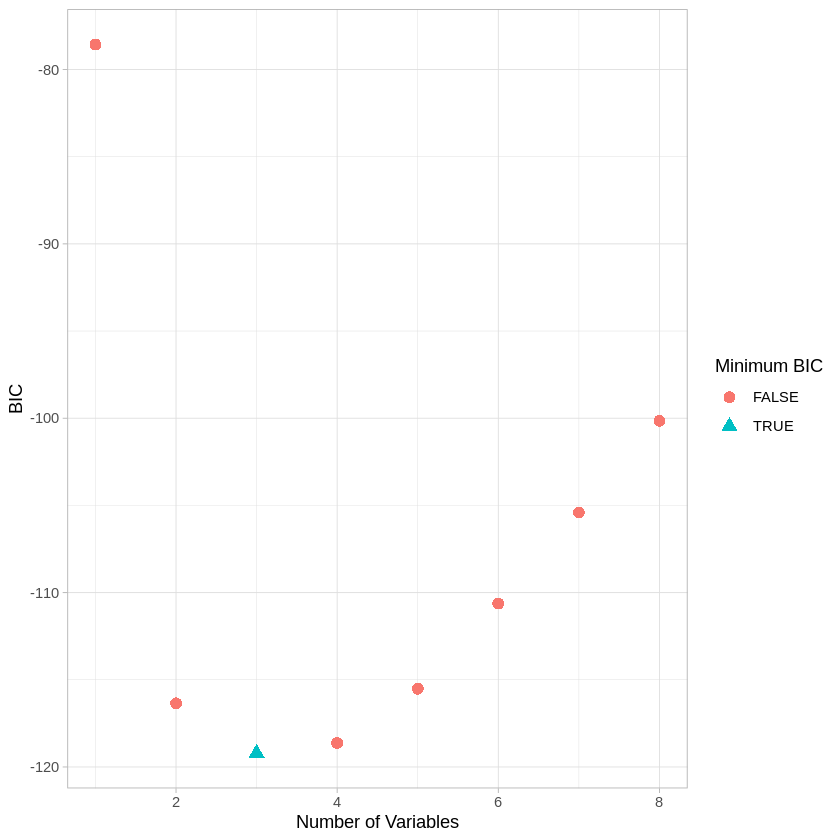

In [ ]:
# Are there any predictors that don't explain large amount of variance in PPI?
regfit_model <- regsubsets(PPI ~., data=df_descript, nvmax=8)
reg_summary <- summary(regfit_model)
reg_summary

# R2 for each tested model
numvar = 1:length(reg_summary$rss)
allfalse = rep(FALSE, length(reg_summary$rss))

df_r2 <- data.frame(numvar = numvar, adjr2 <- reg_summary$adjr2, maxadjr2 <- allfalse)
df_r2$maxadjr2[which.max(reg_summary$adjr2)] <- TRUE
ggplot(df_r2, aes(x=numvar, y=adjr2, shape=maxadjr2, col=maxadjr2)) +
  geom_point() +
  theme_light() +
  labs(x = "Number of Variables", y = "Adj"~R^2, color = 'Maximum Adj.'~R^2, shape = 'Maximum Adj'~R^2)

# 5 variables maximizes R2: RQ, CESD, Avoid_Attach, Partner SR Inst, & Commitment

# BIC for each model
df_bic <- data.frame(numvar = numvar, bic <- reg_summary$bic, minbic <- allfalse)
df_bic$minbic[which.min(reg_summary$bic)] <- TRUE

ggplot(df_bic,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")
# Min BIC at 3 variables: RQ, CESD, & Avoid_Attach

Based on the best subset selection results, a model with 3-5 variables will be best for maximizing the variance explained and minimizing the BIC. Therefore, I will conduct a mixed effects analysis using a model that has 4 variables: Relationship Quality, Depressive Symptoms, Avoidant Attachment style, and Partner Self-reported instrumentality. 

In this context, partner-self reported instrumentality will be considered a covariate which allows us to compare perceived instrumentality to actual reported instrumentality, highlighting how PPI may be biased compared to reality. A mixed effects model will be used due to the potential multicollinearity of reported outcomes within a romantic couple; CoupleID will therefore be used as a grouping variable.

### 5. Mixed Effects Modeling

In [ ]:
# Add PSR_Inst variable to df_cleaned
df_cleaned <- cbind(df_cleaned, PSR_Inst = df_descript$PSR_Inst)
head(df_cleaned)

# Mixed effects model
mixed_model <- lmer(PPI ~ GM_RQ + GM_depression + Avoid_Attach + PSR_Inst +
                      (1|CoupleID), data=df_cleaned)
summary(mixed_model)
summ(mixed_model) # gives p-values, AIC & BIC, Pseudo-R2


,CoupleID,ParticipantID,Gender,RSE1,RSE2,RSE3,RSE4,RSE5,RSE6,RSE7,⋯,GM_RQ,SE,GM_SE,Anx_Attach,Avoid_Attach,Commitment,GM_Commit,SR_Inst,PPI,PSR_Inst
,<chr>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,⋯,"<dbl[,1]>",<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>",<dbl>,<dbl>
1,001,001D,2,9,9,7,5,9,9,9,⋯,0.5059524,7.2,0.1870748,2.166667,1.166667,7.600000,-0.08185131,-1.0385690,1.8888889,3.0000000
2,001,001R,1,9,9,9,8,8,9,8,⋯,0.1726190,7.8,0.7870748,4.166667,1.666667,6.600000,-1.08185131,-0.1496801,4.6666667,2.1111111
3,002,002D,1,8,8,9,7,9,9,8,⋯,0.6726190,7.9,0.8870748,1.166667,1.000000,7.466667,-0.21518465,1.8503199,4.7777778,0.4444444
4,002,002R,2,7,8,7,6,7,8,7,⋯,-0.4940476,6.9,-0.1129252,2.666667,1.666667,4.866667,-2.81518465,-2.7052357,0.3333333,5.0000000
5,003,003D,1,8,9,9,7,8,7,4,⋯,-0.6607143,7.4,0.3870748,2.166667,1.000000,7.200000,-0.48185131,-2.0385690,1.5555556,2.0000000
6,003,003R,2,5,5,5,6,5,5,6,⋯,0.5059524,5.7,-1.3129252,3.166667,2.333333,8.200000,0.51814869,-1.1496801,4.0000000,1.1111111


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: PPI ~ GM_RQ + GM_depression + Avoid_Attach + PSR_Inst + (1 |  
    CoupleID)
   Data: df_cleaned

REML criterion at convergence: 620.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2632 -0.7046  0.1592  0.7278  2.0518 

Random effects:
 Groups   Name        Variance Std.Dev.
 CoupleID (Intercept) 0.000    0.000   
 Residual             1.329    1.153   
Number of obs: 196, groups:  CoupleID, 98

Fixed effects:
              Estimate Std. Error t value
(Intercept)     3.3966     0.3051  11.133
GM_RQ           0.7570     0.1593   4.751
GM_depression  -1.0602     0.1921  -5.518
Avoid_Attach   -0.3883     0.1355  -2.865
PSR_Inst        0.1154     0.0567   2.036

Correlation of Fixed Effects:
            (Intr) GM_RQ  GM_dpr Avd_At
GM_RQ       -0.419                     
GM_depressn  0.222  0.077              
Avoid_Attch -0.765  0.605 -0.341       
PSR_Inst    -0.612 -0.054  0.054  0.035
optimizer (nloptwrap) convergence

MODEL INFO:
Observations: 196
Dependent Variable: PPI
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 634.21, BIC = 657.16
Pseudo-R² (fixed effects) = 0.52
Pseudo-R² (total) = 0.52 

FIXED EFFECTS:
-----------------------------------------------------------
                       Est.   S.E.   t val.     d.f.      p
------------------- ------- ------ -------- -------- ------
(Intercept)            3.40   0.31    11.03   189.33   0.00
GM_RQ                  0.76   0.16     4.71   186.38   0.00
GM_depression         -1.06   0.19    -5.47   185.70   0.00
Avoid_Attach          -0.39   0.14    -2.84   191.00   0.01
PSR_Inst               0.12   0.06     2.02   190.18   0.04
-----------------------------------------------------------

p values calculated using Kenward-Roger standard errors and
d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- -----------
 CoupleID   (Intercept)     0.00    
 Residual             

The mixed effects model revealed significant main effects for all predictors in the model. As hypothesized, depressive symptoms were negatively associated with PPI controlling for relationship quality, avoidant attachment style, and partner self-reported instrumentality, whereas relationship quality was positively associated with PPI controlling for depressive symptoms, avoidant attachment style, and partner self-reported instrumentality. Avoidant attachment style was also negatively associated with PPI controlling for other predictors. 

These results suggest that depressive symptoms and avoidant attachment style are associated with perceiving one's partner as less instrumental to their goals, whereas higher relationship quality is associated with perceiving one's partner as more instrumental to their goals. 

### 6. Moderation Analysis

To test the third hypothesis, I conducted a moderation analysis with an interaction term: Relationship Quality x Depressive Symptoms.

In [ ]:
mod_model <- lmer(PPI ~ GM_RQ*GM_depression + PSR_Inst + Avoid_Attach +
                      (1|CoupleID), data=df_cleaned)
summ(mod_model)

# Interaction without Avoid_Attach - Exploratory Analysis
mod_model2 <- lmer(PPI ~ GM_RQ*GM_depression + PSR_Inst +
                      (1|CoupleID), data=df_cleaned)
summ(mod_model2)

# Moderation only emerges as significant when Avoid_Attach is not in model

boundary (singular) fit: see help('isSingular')



MODEL INFO:
Observations: 196
Dependent Variable: PPI
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 636.12, BIC = 662.35
Pseudo-R² (fixed effects) = 0.52
Pseudo-R² (total) = 0.52 

FIXED EFFECTS:
-----------------------------------------------------------------
                             Est.   S.E.   t val.     d.f.      p
------------------------- ------- ------ -------- -------- ------
(Intercept)                  3.30   0.32    10.49   189.99   0.00
GM_RQ                        0.72   0.16     4.40   178.08   0.00
GM_depression               -1.00   0.20    -5.02   186.32   0.00
PSR_Inst                     0.13   0.06     2.22   189.19   0.03
Avoid_Attach                -0.34   0.14    -2.40   185.80   0.02
GM_RQ:GM_depression          0.23   0.17     1.31   184.46   0.19
-----------------------------------------------------------------

p values calculated using Kenward-Roger standard errors and
d.f.

RANDOM EFFECTS:
------------------------------------
  Group      

boundary (singular) fit: see help('isSingular')



MODEL INFO:
Observations: 196
Dependent Variable: PPI
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 637.84, BIC = 660.79
Pseudo-R² (fixed effects) = 0.51
Pseudo-R² (total) = 0.51 

FIXED EFFECTS:
-----------------------------------------------------------------
                             Est.   S.E.   t val.     d.f.      p
------------------------- ------- ------ -------- -------- ------
(Intercept)                  2.72   0.20    13.58   181.02   0.00
GM_RQ                        0.92   0.14     6.59   167.24   0.00
GM_depression               -1.12   0.19    -5.78   185.89   0.00
PSR_Inst                     0.14   0.06     2.39   189.97   0.02
GM_RQ:GM_depression          0.34   0.17     1.99   172.91   0.05
-----------------------------------------------------------------

p values calculated using Kenward-Roger standard errors and
d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- -----------
 Coup

There was no significant moderation by Relationship Quality x Depressive Symptoms on PPI in the first model where all predictors from the best subset selection were included (*B* = 0.23, SE = 0.17, *p* > 0.05). 

Considering the relatively strong correlation between depressive symptoms and avoidant attachment, I conducted an exploratory moderation analysis where avoidant attachment was removed from the model. All else consistent, the Relationship Quality x Depressive Symptoms interaction emerged as significant, such that having higher relationship quality partially buffered the negative relationship between depressive symptoms and PPI (*B* = 0.34, SE = 0.17, *p* = 0.05). 

This interaction seems particularly weak, so future research should attempt to replicate this effect, perhaps with a more controlled experimental paradigm and instrumentality rated by independent coders rather than romantic partners (who carry their own biases).

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



MODEL INFO:
Observations: 196
Dependent Variable: PPI
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 625.03, BIC = 647.97
Pseudo-R² (fixed effects) = 0.51
Pseudo-R² (total) = 0.51 

FIXED EFFECTS:
------------------------------------------------------------------
                              Est.   S.E.   t val.     d.f.      p
-------------------------- ------- ------ -------- -------- ------
(Intercept)                   2.06   0.21     9.59   159.13   0.00
GM_depression                -1.36   0.19    -7.07   170.72   0.00
low_rq                        0.92   0.14     6.59   176.12   0.00
PSR_Inst                      0.14   0.06     2.39   200.04   0.02
GM_depression:low_rq          0.34   0.17     1.99   182.08   0.05
------------------------------------------------------------------

p values calculated using Kenward-Roger standard errors and
d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- --------

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



MODEL INFO:
Observations: 196
Dependent Variable: PPI
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 625.03, BIC = 647.97
Pseudo-R² (fixed effects) = 0.51
Pseudo-R² (total) = 0.51 

FIXED EFFECTS:
-------------------------------------------------------------------
                               Est.   S.E.   t val.     d.f.      p
--------------------------- ------- ------ -------- -------- ------
(Intercept)                    3.37   0.23    14.55   200.71   0.00
GM_depression                 -0.88   0.26    -3.40   199.44   0.00
high_rq                        0.92   0.14     6.59   176.12   0.00
PSR_Inst                       0.14   0.06     2.39   200.04   0.02
GM_depression:high_rq          0.34   0.17     1.99   182.08   0.05
-------------------------------------------------------------------

p values calculated using Kenward-Roger standard errors and
d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- -------------

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



MODEL INFO:
Observations: 196
Dependent Variable: PPI
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 625.03, BIC = 647.97
Pseudo-R² (fixed effects) = 0.51
Pseudo-R² (total) = 0.51 

FIXED EFFECTS:
-----------------------------------------------------------
                       Est.   S.E.   t val.     d.f.      p
------------------- ------- ------ -------- -------- ------
(Intercept)            3.28   0.23    14.35   199.06   0.00
GM_RQ                  0.76   0.19     3.98   172.37   0.00
low_dep               -1.12   0.19    -5.78   195.75   0.00
PSR_Inst               0.14   0.06     2.39   200.04   0.02
GM_RQ:low_dep          0.34   0.17     1.99   182.08   0.05
-----------------------------------------------------------

p values calculated using Kenward-Roger standard errors and
d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- -----------
 CoupleID   (Intercept)     0.00    
 Residual             

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



MODEL INFO:
Observations: 196
Dependent Variable: PPI
Type: Mixed effects linear regression 

MODEL FIT:
AIC = 625.03, BIC = 647.97
Pseudo-R² (fixed effects) = 0.51
Pseudo-R² (total) = 0.51 

FIXED EFFECTS:
------------------------------------------------------------
                        Est.   S.E.   t val.     d.f.      p
-------------------- ------- ------ -------- -------- ------
(Intercept)             2.16   0.22     9.99   178.58   0.00
GM_RQ                   1.09   0.13     8.24   187.61   0.00
high_dep               -1.12   0.19    -5.78   195.75   0.00
PSR_Inst                0.14   0.06     2.39   200.04   0.02
GM_RQ:high_dep          0.34   0.17     1.99   182.08   0.05
------------------------------------------------------------

p values calculated using Kenward-Roger standard errors and
d.f.

RANDOM EFFECTS:
------------------------------------
  Group      Parameter    Std. Dev. 
---------- ------------- -----------
 CoupleID   (Intercept)     0.00    
 Residual    

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



JOHNSON-NEYMAN INTERVAL 

When GM_RQ is OUTSIDE the interval [1.34, 211.57], the slope of
GM_depression is p < .05.

Note: The range of observed values of GM_RQ is [-2.99, 0.67]

SIMPLE SLOPES ANALYSIS 

Slope of GM_depression when GM_RQ = -0.706: 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -1.36   0.19    -7.07   0.00

Slope of GM_depression when GM_RQ =  0.706: 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.88   0.26    -3.41   0.00


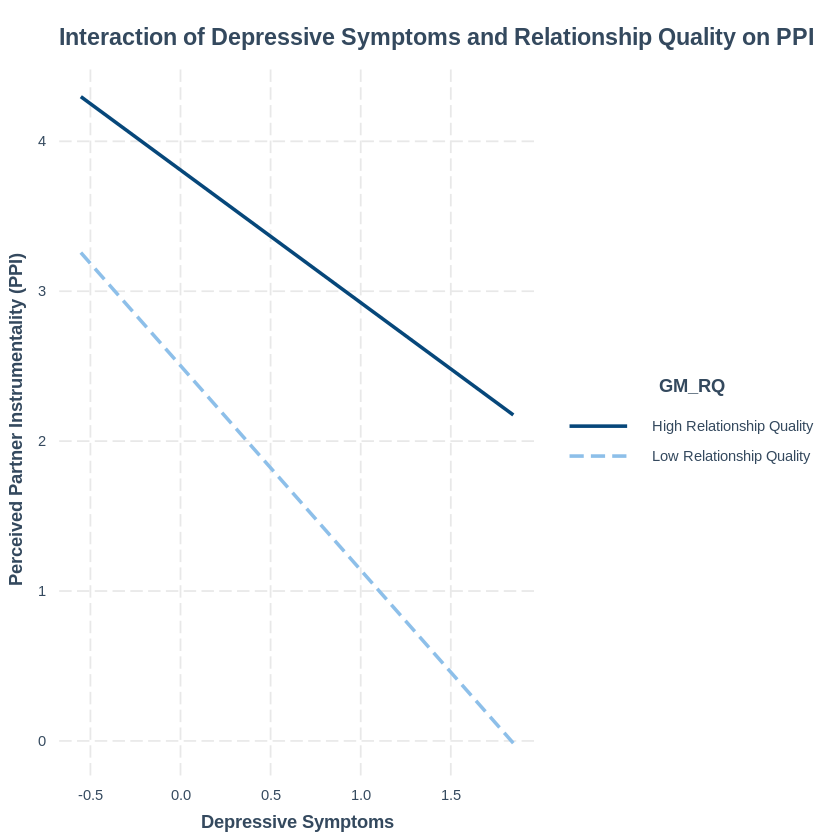

In [ ]:
# Decompose Simple Effects - Moderation Model 2

# For low RQ values, we want to add 1 SD so that they are shifted to the right in the distribution; vice versa for high values 
df_cleaned$low_rq <- (df_cleaned$GM_RQ + sd(df_cleaned$GM_RQ))
df_cleaned$high_rq <- (df_cleaned$GM_RQ - sd(df_cleaned$GM_RQ))

df_cleaned$low_dep <- (df_cleaned$GM_depression + sd(df_cleaned$GM_depression))
df_cleaned$high_dep <- (df_cleaned$GM_depression - sd(df_cleaned$GM_depression))

# Low RQ at mean dep sx.
mod_low_rq <- lmer(PPI ~ 1 + GM_depression*low_rq + PSR_Inst +
                      (1|CoupleID), REML = F, data = df_cleaned)
summ(mod_low_rq)
## B = -1.36

# High RQ at mean dep sx.
mod_high_rq <- lmer(PPI ~ 1 + GM_depression*high_rq + PSR_Inst +
                      (1|CoupleID), REML = F, data = df_cleaned)
summ(mod_high_rq)
## B = -0.88

# Low dep at mean RQ
mod_low_dep <- lmer(PPI ~ 1 + GM_RQ*low_dep + PSR_Inst +
                      (1|CoupleID), REML = F, data = df_cleaned)
summ(mod_low_dep)
# B = 0.76

# High dep at mean RQ
mod_high_dep <- lmer(PPI ~ 1 + GM_RQ*high_dep + PSR_Inst +
                      (1|CoupleID), REML = F, data = df_cleaned)
summ(mod_high_dep)
# B = 1.10

# Decompose simple effects of moderation model
quality_vec <- c(-0.706, 0.706)
sim_slopes(mod_model2, pred=GM_depression, modx=GM_RQ, modx.values =quality_vec)

interact_plot(mod_model2, pred=GM_depression, modx=GM_RQ, modx.values=quality_vec,
              x.label = "Depressive Symptoms", y.label = "Perceived Partner Instrumentality (PPI)",
              modx.labels = c("Low Relationship Quality", "High Relationship Quality"),
              main.title = "Interaction of Depressive Symptoms and Relationship Quality on PPI")

By decomposing the simple effects of the exploratory moderation model, we can see that the simple effect of depressive symptoms on PPI (*B* = -1.36, SE = 0.19, *p* < 0.05) is significantly more negative for those with relatively low relationship quality compared to the simple effect of depressive symptoms on PPI for those with relatively high relationship quality (*B* = -0.88, SE = 0.26, *p* < 0.05).

# Conclusions

In this project, I analyzed how several individual difference factors predicted differences in perceived partner instrumentality, controlling for partners’ self-reports of their own behavior. First, due to relatively high correlations between the predictor variables, a principal components analysis was used. Through this analysis, only 5 components were necessary to explain over 95% of the variance in PPI, indicating that some of the individual difference factors did not robustly predict PPI. A best subset selection analysis was then used to substantiate the PCA findings and evaluate which predictors should be maintained in the model to maximize variance in PPI explained and minimize BIC. This suggested that a model containing only 3-5 predictors was the best fitting model. Based on this, I selected a model with the top 4 predictors from the best subset selection. When tested using a mixed effects model to control for CoupleID as a grouping variable, all included predictors were significantly associated with differences in PPI; depressive symptoms and avoidant attachment were negatively associated with PPI, whereas relationship quality and partner self-reported instrumentality were positively associated with PPI. 
These preliminary results support the first two hypotheses that depressive symptoms and RQ predicted negative and positive changes in PPI, respectively. Controlling for partner self-reported instrumentality scores allowed for distinction between PPI and partner-reported instrumentality, suggesting that unique biases may enhance or obstruct our awareness of partner support for our goals. These findings are consistent with previous literature examining the associations between depressive symptoms and negative rumination/perceptual biases, as well as between RQ and positive illusions towards one’s partner (Busby et al., 2009; Gara et al., 1993; Morry et al., 2010; Murray et al., 1996; Peckham et al., 2010). 

However, the hypothesized interaction between depressive symptoms and RQ on PPI was not supported. Conditional effects of depressive symptoms and RQ in the model with an interaction term were still significant, which suggests that regardless of a person’s level of RQ, depressive symptoms remain negatively associated with PPI. An exploratory moderation analysis revealed a marginally significant interaction when excluding avoidant attachment from the model, but this finding should be reviewed and replicated in future research to assess whether this interaction is merely spurious. Some research has shown that having depression is associated with both negative self-evaluation and negative evaluation of close others (Clark et al., 1994; Gara et al., 1993), which may additionally affect levels of PPI and explain the lack of a significant interaction in the first model. Thus, more research should be conducted examining whether other variables make it more likely for depressed people to exhibit negative biases towards others, and whether such variables obstruct positive biases towards a partner, such as biases from high RQ. 

Overall, the current work provides initial evidence that individual difference factors may play a role in influencing how instrumental one perceives their romantic partner to be. This work can have implications for how to signal need for support to a partner, as well as how to recognize and benefit from a partner's support.
